# Run ensemble simulation in loop

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from runmfpt import runmfpt

In [3]:
runmfpt()

Start simulation with alpha=0.1
alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 1681391044
Ntraj = 100
Only end points of the 100 trajectories will be printed as the output.
Running the simulation...

-------------launch_2D_ensemble_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
Average time of simulation: 60.3339
Time simulation variance: 2792.99
Output written to STDOUT.
Done.


outT5e+03N1e+02dt1e-01alpha1.00e-01_ensemble.csv saved
Start simulation with alpha=0.2
alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 1681391044
Ntraj = 100
Only end points of the 100 trajectories will be pr

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from settings import init
from types import SimpleNamespace
from fpt_helpers import get_fpt_mean_sd

params=init()
n = SimpleNamespace(**params)
data=[]
for n.alpha in np.arange(n.alpha_min,n.alpha_max,n.alpha_step):
    # print(f"alpha={n.alpha:.2e}")
    output_data_file=f"outT{n.T1:.0e}N{n.Ntraj1:.0e}dt{n.dt1:.0e}alpha{n.alpha:.2e}_ensemble.csv"
    mean_fpt, sd_fpt=get_fpt_mean_sd(output_path=n.output_dir+output_data_file)
    data.append([n.alpha, mean_fpt,sd_fpt])

mfptdf=pd.DataFrame(data, columns=['alpha', 'mean_fpt','sd_fpt'])
mfptdf

,alpha,mean_fpt,sd_fpt
0,0.1,60.333905,53.114961
1,0.2,64.422882,58.157487
2,0.3,67.559646,66.746883
3,0.4,68.380852,68.561266
4,0.5,71.839319,67.568001
5,0.6,68.638520,61.001419
6,0.7,73.872601,71.661004
7,0.8,74.553864,54.002494
8,0.9,82.619007,69.269908
9,1.0,75.968271,60.238718


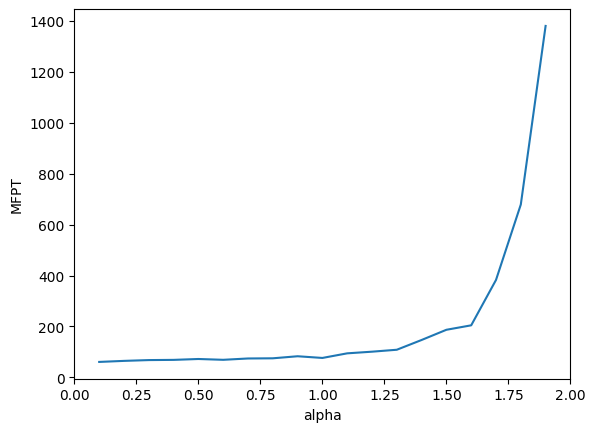

In [10]:
fig,ax=plt.subplots(1,1)
ax.plot(mfptdf['alpha'],mfptdf['mean_fpt'])
ax.set_xlabel('alpha')
ax.set_ylabel('MFPT')
ax.set_xlim((0,2))
plt.show()